# Análisis de los datos

In [ ]:
import pandas as pd

df = pd.read_csv('datos_planta.csv')

,humidity,light,temperature
count,757.000000,757.000000,757.000000
mean,54.624835,15.760898,21.622061
std,12.229153,41.532287,3.781620
min,32.000000,-16.000000,10.780000
25%,42.000000,-15.000000,19.250000
50%,59.000000,-5.000000,22.230000
75%,64.000000,56.000000,23.850000
max,82.000000,100.000000,31.360000


          humidity       light  temperature                timestamp
count   757.000000  757.000000   757.000000                      757
unique         NaN         NaN          NaN                      757
top            NaN         NaN          NaN  2025-04-27 16:07:02.657
freq           NaN         NaN          NaN                        1
mean     54.624835   15.760898    21.622061                      NaN
std      12.229153   41.532287     3.781620                      NaN
min      32.000000  -16.000000    10.780000                      NaN
25%      42.000000  -15.000000    19.250000                      NaN
50%      59.000000   -5.000000    22.230000                      NaN
75%      64.000000   56.000000    23.850000                      NaN
max      82.000000  100.000000    31.360000                      NaN


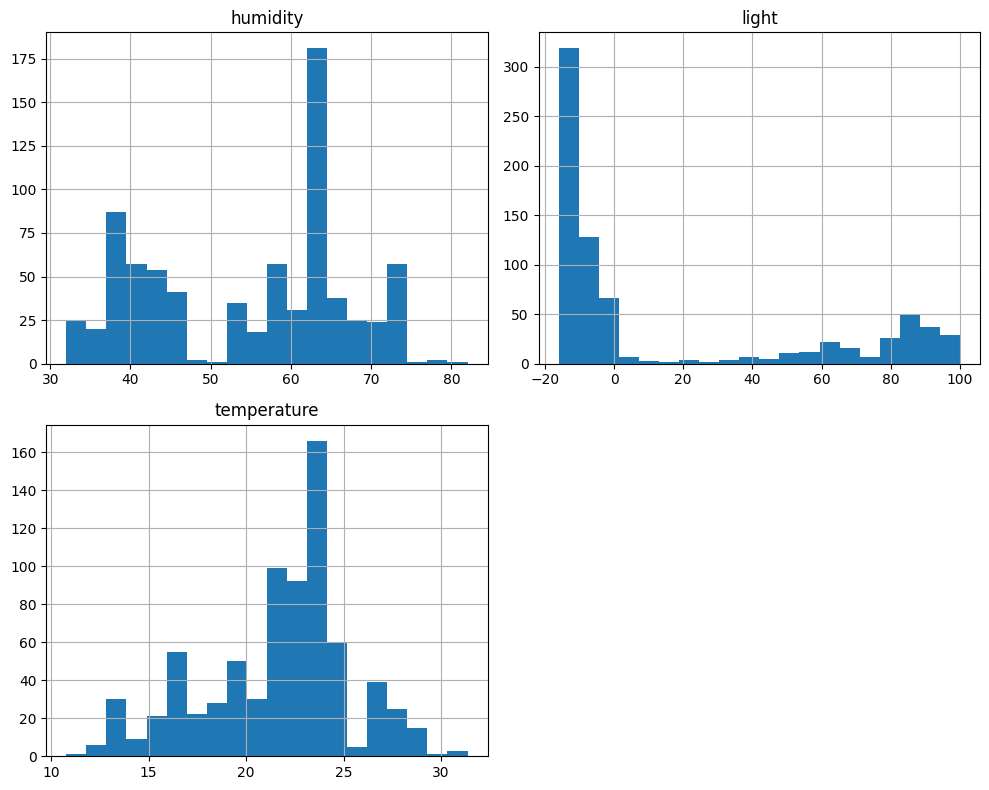

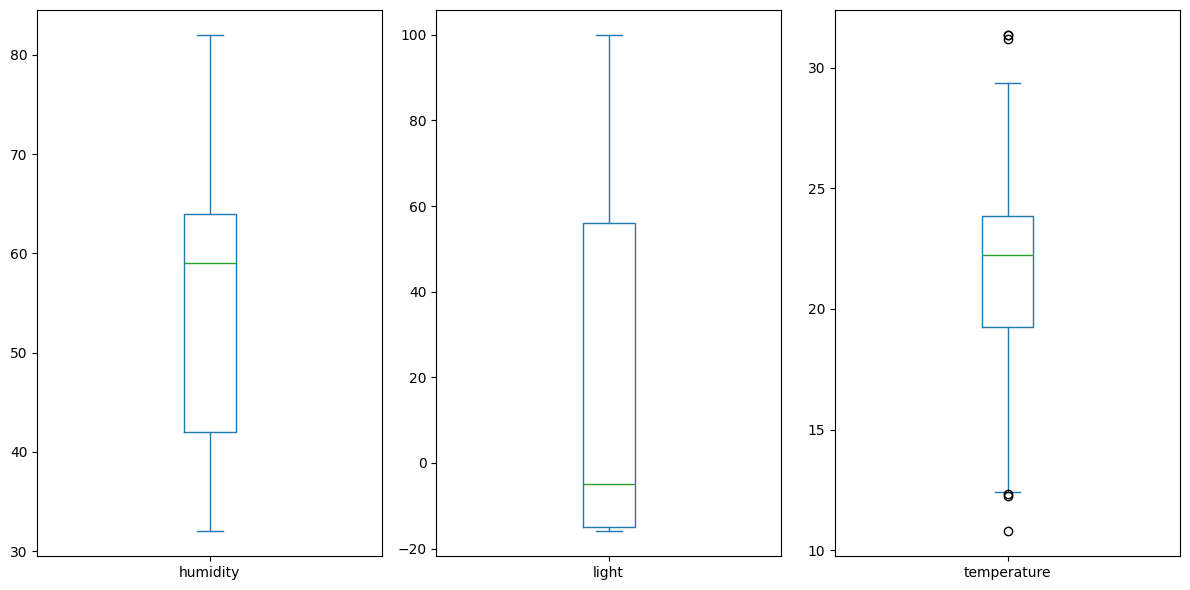

Valores faltantes por columna:
humidity       0
light          0
temperature    0
timestamp      0
dtype: int64


In [7]:
import matplotlib.pyplot as plt

# Estadísticas descriptivas
print(df.describe(include='all'))

# Histogramas para la distribución de cada variable numérica
df.hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

# Boxplots para identificar valores atípicos
df[['humidity', 'light', 'temperature']].plot(kind='box', subplots=True, layout=(1, 3), figsize=(12, 6), sharey=False)
plt.tight_layout()
plt.show()

# Verificar valores faltantes
print("Valores faltantes por columna:")
print(df.isnull().sum())

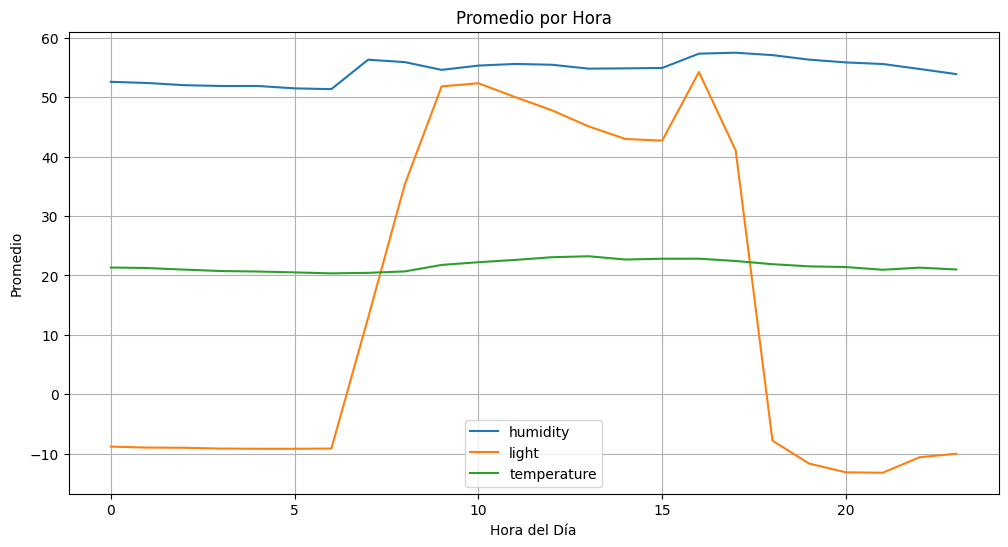

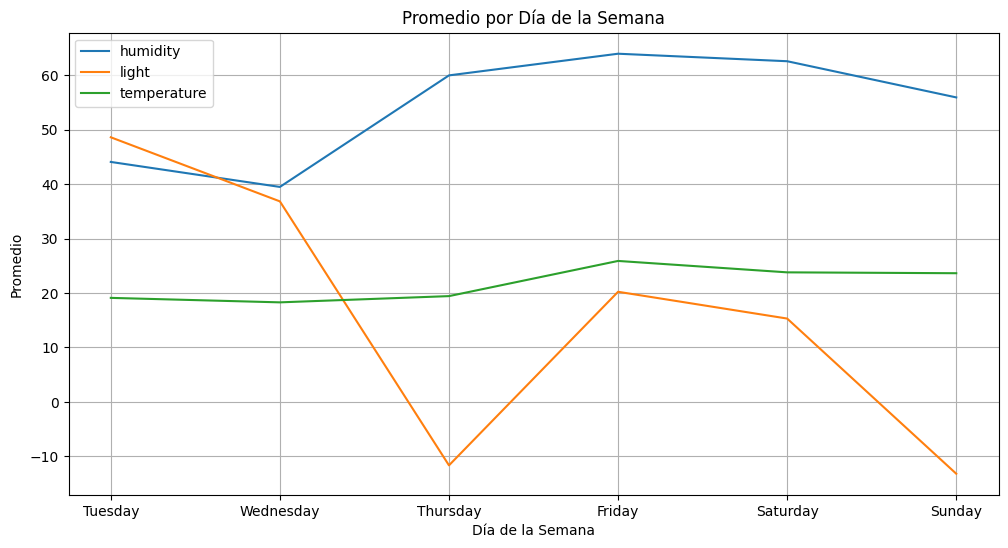

In [ ]:

df['timestamp'] = pd.to_datetime(df['timestamp'])

df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.day_name()

hourly_means = df.groupby('hour')[['humidity', 'light', 'temperature']].mean()
hourly_means.plot(figsize=(12, 6), title='Promedio por Hora')
plt.xlabel('Hora del Día')
plt.ylabel('Promedio')
plt.grid()
plt.show()

weekly_means = df.groupby('day_of_week')[['humidity', 'light', 'temperature']].mean()
weekly_means = weekly_means.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])  # Ordenar días
weekly_means.plot(figsize=(12, 6), title='Promedio por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Promedio')
plt.grid()
plt.show()

Matriz de correlación de Pearson:
             humidity     light  temperature
humidity     1.000000 -0.288625     0.702947
light       -0.288625  1.000000     0.021233
temperature  0.702947  0.021233     1.000000

Matriz de correlación de Spearman:
             humidity     light  temperature
humidity     1.000000 -0.524402     0.563663
light       -0.524402  1.000000    -0.082414
temperature  0.563663 -0.082414     1.000000


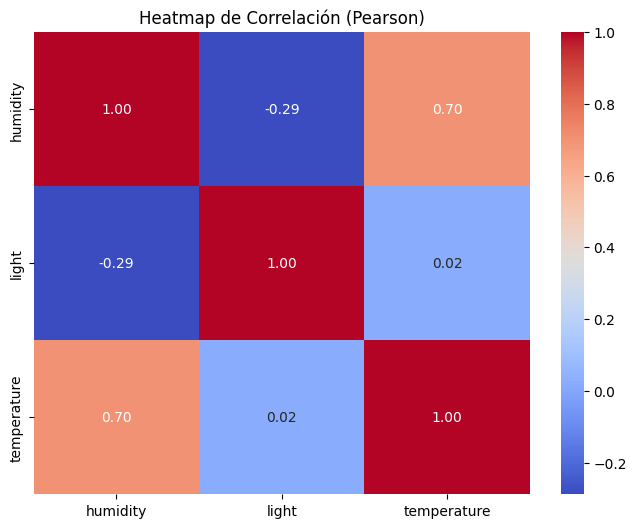

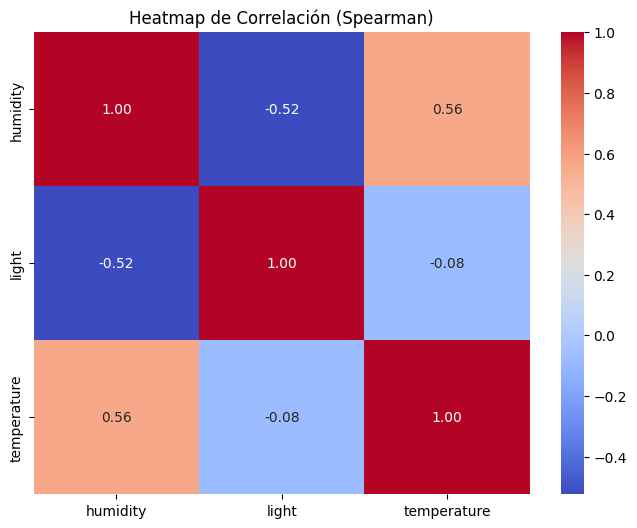

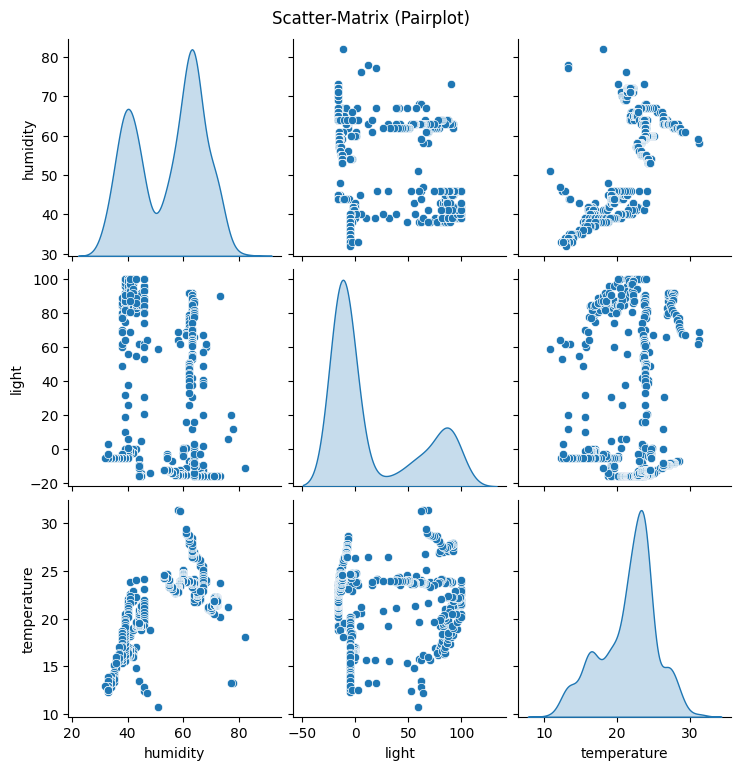

In [10]:
import seaborn as sns

# Matriz de correlación de Pearson
pearson_corr = df[['humidity', 'light', 'temperature']].corr(method='pearson')
print("Matriz de correlación de Pearson:")
print(pearson_corr)

# Matriz de correlación de Spearman
spearman_corr = df[['humidity', 'light', 'temperature']].corr(method='spearman')
print("\nMatriz de correlación de Spearman:")
print(spearman_corr)

# Heatmap de la matriz de correlación de Pearson
plt.figure(figsize=(8, 6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlación (Pearson)')
plt.show()

# Heatmap de la matriz de correlación de Spearman
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlación (Spearman)')
plt.show()

# Scatter-matrix (pairplot) para visualizar relaciones entre variables
sns.pairplot(df[['humidity', 'light', 'temperature']], diag_kind='kde', kind='scatter')
plt.suptitle('Scatter-Matrix (Pairplot)', y=1.02)
plt.show()